<a href="https://colab.research.google.com/github/gummy-brain/Leader-Appeal-in-Times-of-War/blob/main/Pro_Putin_tweets_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install gensim

In [ ]:
pip install nltk

In [ ]:
pip install pyLDAvis

In [ ]:
!python -m pip install -U pip
!python -m pip install -U matplotlib

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#1introduction
import numpy as np
import json
import glob
import pandas as pd
import regex as re
import string

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim_models

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
Putin = pd.read_csv('/content/drive/MyDrive/Putin_cleaned.csv')
Putin.shape

(13128, 34)

In [ ]:
Putin = Putin.loc[Putin['positive_tweet'].isin([1])]
#for row in Putin.text.index:
  #Putin.text.loc[row] = re.sub(r'pic\.twitter\.com\S+|@\S+|#\S+','', Putin.text.loc[row])
Putin.shape

(5075, 34)

In [ ]:
Putin_tweets = Putin["text"].to_list()

In [ ]:
# pro_Putin = pro_russia[pro_russia['text'].str.contains(pat="putin is|respect putin|love putin|i support putin|vladimir putin is|love vladimir putin|respect valdimir putin|i like putin|i like vladimir putin", regex='TRUE')]

In [ ]:
# pro_Ukraine = pro_russia[pro_russia['text'].str.contains(pat="putinwarcrimes|stopputin|standwithukraine|standwithzelensky|istandwithzelensky|istandwithukraine|standwithukraine|stoprussianow|stoprussia|stopputin|stopputinnow|supportukraine|isupportukraine")]

In [ ]:
def remove_stops(text, stops):
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)
    text = re.sub('@[A-Za-z0-9_]+', "", text)
    text = re.sub("#[A-Za-z0-9_]+","", text)
    text = re.sub(r'[^a-zA-Z0-9]+', ' ', text)
    words = text.split()
    final = []
    for word in words:
        if word not in stops:
            final.append(word)
    final = " ".join(final)
    final = final.translate(str.maketrans("", "", string.punctuation))
    final = "".join([i for i in final if not i.isdigit()])
    while "  " in final:
        final = final.replace("  ", " ")
    return (final)

def clean_docs(docs):
    stops = stopwords.words("english")
    newStopWords = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz",]
    stops.append(newStopWords)
    final = []
    for doc in docs:
        clean_doc = remove_stops(doc, stops)
        final.append(clean_doc)
    return (final)

In [ ]:
Putin_tweets_clean = clean_docs(Putin_tweets)

In [ ]:
print(Putin_tweets_clean[0])

In [ ]:
def lemmatization(texts, allowed_postags=["NOUN", "PROPN" "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)

In [ ]:
lemmatized_texts = lemmatization(Putin_tweets_clean)
print (lemmatized_texts[0][0:90])

In [ ]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

In [ ]:
data_words = gen_words(lemmatized_texts)
print (data_words[0][0:20])

['win', 'sodom', 'gomorah']


In [ ]:
#bigrams and trigrams

bigram_phrases = gensim.models.Phrases(data_words, min_count=5, threshold=50)
trigram_phrases = gensim.models.Phrases(bigram_phrases[data_words], threshold=50)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(texts):
  return(bigram[doc] for doc in texts)

def make_trigrams(texts):
  return(trigram[bigram[doc]] for doc in texts)

data_bigrams = make_bigrams(data_words)
data_bigrams_trigrams = make_trigrams(data_bigrams)

data_bigrams_trigrams = list(data_bigrams_trigrams)

In [ ]:
print(data_bigrams_trigrams[11])

['friend', 'krishna', 'ignore', 'anti', 'support', 'element', 'harbor']


In [ ]:
#TF-IDF REMOVAL
from gensim.models import TfidfModel

id2word = corpora.Dictionary(data_bigrams_trigrams)

texts = data_bigrams_trigrams

corpus = [id2word.doc2bow(text) for text in texts]
# print (corpus[0][0:20])

tfidf = TfidfModel(corpus, id2word=id2word)

low_value = 0.03
words  = []
words_missing_in_tfidf = []
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops = low_value_words+words_missing_in_tfidf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow

In [ ]:
# id2word = corpora.Dictionary(data_words)

# corpus = []
# for text in data_words:
#     new = id2word.doc2bow(text)
#     corpus.append(new)

# print (corpus[0][0:20])

# word = id2word[[0][:1][0]]
# print (word)

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=8,
                                           alpha = "asymmetric",
                                           eta=0.31
                                           )

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.342926 -0.102213       1        1  23.525393
1     -0.076572  0.264029       2        1  13.103827
2     -0.212497  0.147220       3        1  11.235925
6      0.209227 -0.218232       4        1   9.064235
3      0.221863 -0.036785       5        1   7.962246
5      0.213046  0.109690       6        1   7.655518
9      0.100602  0.215011       7        1   7.361016
8      0.017816 -0.227558       8        1   7.066170
4     -0.034537  0.000270       9        1   6.880926
7     -0.096022 -0.151434      10        1   6.144743, topic_info=           Term        Freq       Total Category  logprob  loglift
6       support  580.000000  580.000000  Default  30.0000  30.0000
31          amp  217.000000  217.000000  Default  29.0000  29.0000
121       stand  205.000000  205.000000  Default  28.0000  28.0000
49       people  359.000000  359.000000  Default  27.0000  27.0000
217     country  287.000000  287.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
700      finish    5.991009    8.019913  Topic10  -5.7024   2.4979
889        fund    6.585954    8.871490  Topic10  -5.6077   2.4917
2871      cease    6.879008    9.297463  Topic10  -5.5642   2.4883
566     version    6.482847    8.942685  Topic10  -5.6235   2.4679
3619  encourage    6.685446    9.870811  Topic10  -5.5927   2.3999

[363 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
601       5  0.910012    accept
1460      9  0.863635   account
832       2  0.936127       act
181       9  0.930741    action
630       4  0.933082  actually
...     ...       ...       ...
30        2  0.313763     world
30        3  0.332220     world
1172      9  0.845293     write
356      10  0.930126      year
682       3  0.899454       yet

[359 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 7, 4, 6, 10, 9, 5, 8])

In [ ]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.084*"support" + 0.052*"people" + 0.031*"want" + 0.028*"make" + '
  '0.022*"world" + 0.020*"ukraine" + 0.019*"war" + 0.018*"nazi" + 0.018*"say" '
  '+ 0.017*"use"'),
 (1,
  '0.036*"love" + 0.036*"world" + 0.026*"let" + 0.022*"operation" + '
  '0.021*"look" + 0.021*"call" + 0.020*"freedom" + 0.020*"leader" + '
  '0.020*"man" + 0.016*"fight"'),
 (2,
  '0.058*"country" + 0.044*"world" + 0.041*"know" + 0.041*"thank" + '
  '0.035*"well" + 0.027*"even" + 0.022*"sanction" + 0.020*"give" + '
  '0.018*"stop" + 0.018*"government"'),
 (3,
  '0.067*"go" + 0.034*"try" + 0.029*"come" + 0.023*"news" + 0.021*"propaganda" '
  '+ 0.017*"do" + 0.014*"end" + 0.010*"reality" + 0.009*"aid" + '
  '0.009*"clearly"'),
 (4,
  '0.025*"speak" + 0.023*"hero" + 0.019*"understand" + 0.017*"follow" + '
  '0.017*"ism" + 0.017*"watch" + 0.016*"action" + 0.015*"ally" + 0.015*"find" '
  '+ 0.015*"enjoy"'),
 (5,
  '0.052*"get" + 0.027*"say" + 0.024*"power" + 0.022*"mean" + 0.021*"video" + '
  '0.017*"play" + 0.01

In [ ]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_bigrams_trigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.4568777868590234


In [ ]:
# # supporting function
# def compute_coherence_values(corpus, dictionary, k, a, b):

#     lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                            id2word=dictionary,
#                                            num_topics=k,
#                                            random_state=100,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha=a,
#                                            eta=b)

#     coherence_model_lda = CoherenceModel(model=lda_model, texts=data_bigrams_trigrams, dictionary=id2word, coherence='c_v')

#     return coherence_model_lda.get_coherence()

In [ ]:
# import numpy as np
# import tqdm

# grid = {}
# grid['Validation_Set'] = {}

# # Topics range
# min_topics = 15
# max_topics = 30
# step_size = 5
# topics_range = range(min_topics, max_topics, step_size)

# # Alpha parameter
# alpha = list(np.arange(0.01, 1, 0.3))
# alpha.append('symmetric')
# alpha.append('asymmetric')

# # Beta parameter
# beta = list(np.arange(0.01, 1, 0.3))
# beta.append('symmetric')

# # Validation sets
# num_of_docs = len(corpus)
# corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)),
#                corpus]

# corpus_title = ['75% Corpus', '100% Corpus']

# model_results = {'Validation_Set': [],
#                  'Topics': [],
#                  'Alpha': [],
#                  'Beta': [],
#                  'Coherence': []
#                 }

# # Can take a long time to run
# if 1 == 1:
#     pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))

#     # iterate through validation corpuses
#     for i in range(len(corpus_sets)):
#         # iterate through number of topics
#         for k in topics_range:
#             # iterate through alpha values
#             for a in alpha:
#                 # iterare through beta values
#                 for b in beta:
#                     # get the coherence score for the given parameters
#                     cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word,
#                                                   k=k, a=a, b=b)
#                     # Save the model results
#                     model_results['Validation_Set'].append(corpus_title[i])
#                     model_results['Topics'].append(k)
#                     model_results['Alpha'].append(a)
#                     model_results['Beta'].append(b)
#                     model_results['Coherence'].append(cv)

#                     pbar.update(1)
#     pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
#     pbar.close()

In [ ]:
# setup: get the model's topics in their native ordering...
all_topics = lda_model.print_topics()
# ...then create a empty list per topic to collect the docs:
docs_per_topic = [[] for _ in all_topics]

# now, for every doc...
for doc_id, doc_bow in enumerate(corpus):
    # ...get its topics...
    doc_topics = lda_model.get_document_topics(doc_bow)
    # ...& for each of its topics...
    for topic_id, score in doc_topics:
        # ...add the doc_id & its score to the topic's doc list
        docs_per_topic[topic_id].append((doc_id, score))

In [ ]:
# After this, you can see the list of all (doc_id, score) values for a certain topic like this (for topic 0):
print(docs_per_topic[0])

[(0, 0.80041414), (1, 0.26990467), (2, 0.18578562), (3, 0.15376133), (4, 0.27381265), (5, 0.022697648), (6, 0.21919195), (7, 0.029791253), (8, 0.61064166), (9, 0.022617133), (10, 0.6017403), (11, 0.46885535), (12, 0.2274845), (13, 0.04071017), (14, 0.02261713), (15, 0.84043276), (16, 0.029177416), (17, 0.051574197), (18, 0.10175325), (19, 0.45792526), (20, 0.352215), (21, 0.109882586), (22, 0.03404892), (23, 0.09255621), (24, 0.020439673), (25, 0.033976234), (26, 0.73445106), (27, 0.40109265), (28, 0.49457824), (29, 0.034118652), (30, 0.699018), (31, 0.8008721), (32, 0.7572641), (33, 0.69142723), (34, 0.26651067), (35, 0.040716007), (36, 0.15725802), (37, 0.6017486), (38, 0.25915143), (39, 0.025674013), (40, 0.051458012), (41, 0.06783617), (42, 0.61320883), (43, 0.75876313), (44, 0.068293445), (45, 0.70272094), (46, 0.09234655), (47, 0.0678402), (48, 0.7774966), (49, 0.24811544), (50, 0.11599684), (51, 0.052435085), (52, 0.730199), (53, 0.34664896), (54, 0.61538786), (55, 0.84036076), 

In [ ]:
# If you're interested in the top docs per topic, you can further sort each list's pairs by their score:

for doc_list in docs_per_topic:
    doc_list.sort(key=lambda id_and_score: id_and_score[1], reverse=True)

In [ ]:
# Then, you could get the top-10 docs for topic 0 like:

print(docs_per_topic[0:2][:10])

[[(1697, 0.90042603), (238, 0.8862138), (247, 0.8862138), (4402, 0.8862136), (3925, 0.8862126), (132, 0.88621104), (3319, 0.88620365), (4254, 0.8861958), (655, 0.88615453), (1263, 0.8861478), (78, 0.869546), (105, 0.8672494), (4020, 0.8672491), (4836, 0.8672491), (734, 0.8672481), (797, 0.86724806), (4428, 0.86723936), (4481, 0.8672387), (854, 0.8671775), (5003, 0.86716986), (1579, 0.8671631), (3117, 0.867161), (2515, 0.86715347), (1059, 0.86709046), (996, 0.85414535), (4868, 0.8406991), (1336, 0.8406954), (4436, 0.8406934), (3393, 0.840689), (692, 0.84068835), (1694, 0.8406882), (3595, 0.8406788), (4526, 0.84067535), (1176, 0.84066325), (222, 0.84065574), (2676, 0.84062874), (4465, 0.8405426), (15, 0.84043276), (55, 0.84036076), (3572, 0.82571584), (835, 0.8161894), (1178, 0.816189), (2240, 0.8111333), (1608, 0.80087405), (1792, 0.80087405), (3245, 0.800874), (685, 0.80087394), (811, 0.80087394), (838, 0.80087394), (865, 0.80087394), (985, 0.80087394), (1029, 0.80087394), (1110, 0.800

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=Putin_tweets)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.8004,"support, people, want, make, world, ukraine, w...",and this is why #russia will win! #usa = sodo...
1,1,8.0,0.3204,"stand, time, need, friend, always, peace, kill...",#russia given unconditional support. to #india...
2,2,1.0,0.3508,"love, world, let, operation, look, call, freed...",#putin looks like an idiot now. \ni don’t see ...
3,3,7.0,0.3903,"truth, think, ever, save, bring, thing, soldie...",polite russian soldiers playing with children ...
4,4,2.0,0.5467,"country, world, know, thank, well, even, sanct...",they say the whole world is sanctioning russia...
5,5,1.0,0.5721,"love, world, let, operation, look, call, freed...","brave,gallant #russianarmy baptizing #ukraine ..."
6,6,1.0,0.6738,"love, world, let, operation, look, call, freed...",#mariopol is the new stalingrad !\nwhere the b...
7,7,3.0,0.6825,"go, try, come, news, propaganda, do, end, real...",🇷🇺🇩🇪 asked #putin to clarify the #rubleforgas...
8,8,0.0,0.6107,"support, people, want, make, world, ukraine, w...",well said sergey #lavrov. i support your view....
9,9,7.0,0.4590,"truth, think, ever, save, bring, thing, soldie...",the cat captured a russian soldier in one of t...


In [ ]:
df_dominant_topic.shape

(5075, 5)

In [ ]:
df_dominant_topic['Dominant_Topic'].unique()

array([0., 8., 1., 7., 2., 3., 4., 9., 5., 6.])

In [ ]:
old_values = df_dominant_topic['Dominant_Topic'].unique()
new_values = ["1", "9", "2", "8", "3", "4", "5", "10", "6", "7"]

In [ ]:
df_dominant_topic['Dominant_Topic'] = df_dominant_topic['Dominant_Topic'].replace(old_values, new_values)
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.8004,"support, people, want, make, world, ukraine, w...",and this is why #russia will win! #usa = sodo...
1,1,9.0,0.3204,"stand, time, need, friend, always, peace, kill...",#russia given unconditional support. to #india...
2,2,2.0,0.3508,"love, world, let, operation, look, call, freed...",#putin looks like an idiot now. \ni don’t see ...
3,3,8.0,0.3903,"truth, think, ever, save, bring, thing, soldie...",polite russian soldiers playing with children ...
4,4,3.0,0.5467,"country, world, know, thank, well, even, sanct...",they say the whole world is sanctioning russia...
5,5,2.0,0.5721,"love, world, let, operation, look, call, freed...","brave,gallant #russianarmy baptizing #ukraine ..."
6,6,2.0,0.6738,"love, world, let, operation, look, call, freed...",#mariopol is the new stalingrad !\nwhere the b...
7,7,4.0,0.6825,"go, try, come, news, propaganda, do, end, real...",🇷🇺🇩🇪 asked #putin to clarify the #rubleforgas...
8,8,1.0,0.6107,"support, people, want, make, world, ukraine, w...",well said sergey #lavrov. i support your view....
9,9,8.0,0.4590,"truth, think, ever, save, bring, thing, soldie...",the cat captured a russian soldier in one of t...


In [ ]:
df_dominant_topic['Dominant_Topic'].unique()

array([ 1.,  9.,  2.,  8.,  3.,  4.,  5., 10.,  6.,  7.])

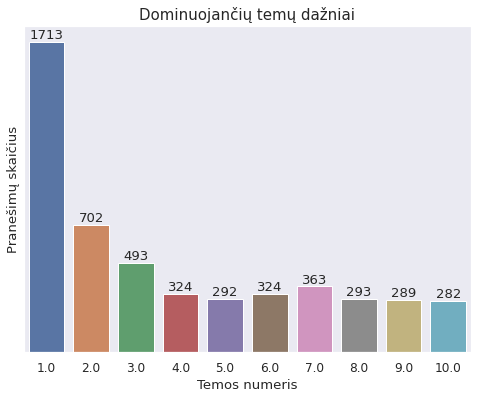

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
sns.set(font_scale = 1.1)

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_dominant_topic, x='Dominant_Topic')
plt.title('Dominuojančių temų dažniai pranešimuose apie V. Putiną', fontsize=15)
plt.xlabel('Temos numeris')
plt.ylabel('Pranešimų skaičius')
ax.bar_label(ax.containers[0])
plt.yticks([])
plt.show()

In [ ]:
import textwrap
print('Top 10 most relevant tweets for each topic\n')
for doc_list in docs_per_topic:
  print(f"Topic {docs_per_topic.index(doc_list)+1}")
  for doc_index, topic_score in doc_list[:20]:
    print(f"Tweet index no.: {doc_index}\nTopic score: {topic_score}\nDate: {Putin.tweetcreatedts.iloc[doc_index]}\nUsermame: {Putin.username.iloc[doc_index]}\n")
    print(textwrap.fill(Putin.text.iloc[doc_index], 160) + "\n")

Top 10 most relevant tweets for each topic

Topic 1
Tweet index no.: 1697
Topic score: 0.9004260301589966
Date: 2017-04-27 00:17:29.000000
Usermame: Vikaspandey19s

dear #brics what are doing brics for russia? brics will have to help russia, make powerful to  to counter usa by military, make more powerful organization to
brics than nato.    #istandwithputin

Tweet index no.: 238
Topic score: 0.8862137794494629
Date: 2022-03-26 21:10:06.000000
Usermame: JoshtheScott1

people who support  are supporting #racism and #bigotry. people who support #ukraine are supporting #genocide of #russians.  #standwithrussia  #standwithputin
#rootinforputin

Tweet index no.: 247
Topic score: 0.8862137794494629
Date: 2015-08-28 02:25:48.000000
Usermame: davidwjohns1111

people who support   are supporting #racism and #bigotry. people who support #ukraine are supporting #genocide of #russians.  #standwithrussia  #standwithputin
#rootinforputin

Tweet index no.: 4402
Topic score: 0.8862136006355286
Date: 20

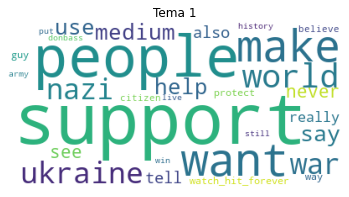

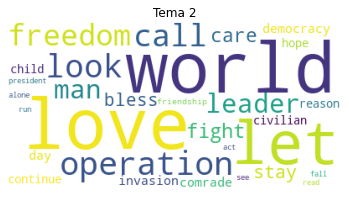

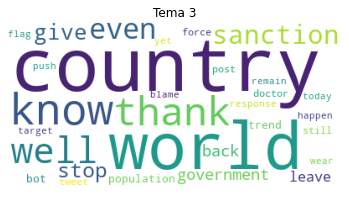

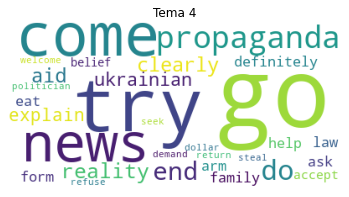

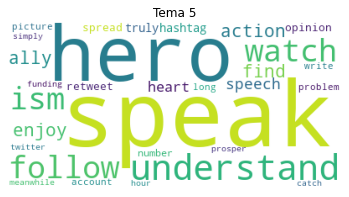

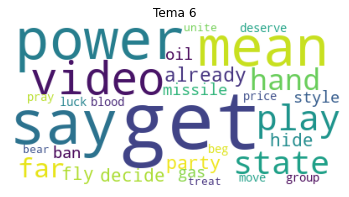

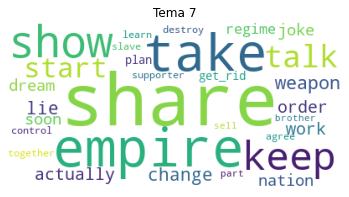

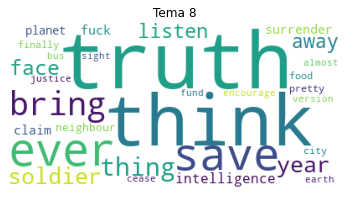

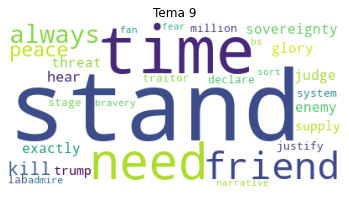

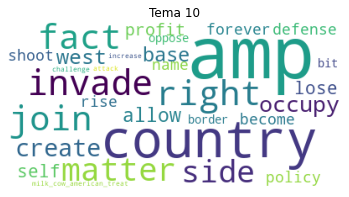

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
for t in range(lda_model.num_topics):
    plt.figure()
    plt.imshow(WordCloud(background_color='white', prefer_horizontal=1.0).fit_words(dict(lda_model.show_topic(t, 30))))
    plt.axis("off")
    plt.title("Tema " + str(t+1))
    plt.show()

In [ ]:
#pyLDAvis.save_html(vis, 'lda.html')